In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
[X_train, y_train], [X_test, y_test] = keras.datasets.cifar10.load_data()
X_train = X_train / 255
X_test = X_test / 255

In [4]:
keras.backend.clear_session()

denoising_encoder = keras.models.Sequential([ 
    keras.layers.GaussianNoise(0.1, input_shape=[32, 32, 3]),
    keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
])

denoising_decoder = keras.models.Sequential([ 
    keras.layers.Dense(16*16*32, activation="relu", input_shape=[512]),
    keras.layers.Reshape([16, 16, 32]),
    keras.layers.Conv2DTranspose(3, 3, 2, padding="same", activation="sigmoid")
])

denoising_autoencoder = keras.models.Sequential([denoising_encoder, denoising_decoder])

denoising_autoencoder.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=["mse"])

denoising_autoencoder.fit(X_train, X_train, epochs=5, validation_data=(X_test, X_test))

Epoch 1/10
1563/1563 [==============================] - 26s 15ms/step - loss: 0.5945 - mse: 0.0190 - val_loss: 0.5938 - val_mse: 0.0183
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5738 - mse: 0.0104 - val_loss: 0.5772 - val_mse: 0.0112
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5693 - mse: 0.0087 - val_loss: 0.5738 - val_mse: 0.0099
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5674 - mse: 0.0080 - val_loss: 0.5723 - val_mse: 0.0094
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5662 - mse: 0.0075 - val_loss: 0.5714 - val_mse: 0.0092
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5653 - mse: 0.0072 - val_loss: 0.5690 - val_mse: 0.0080
Epoch 7/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.5647 - mse: 0.0070 - val_loss: 0.5678 - val_mse: 0.0077
Epoch 8/10
1563/1563 [==========================

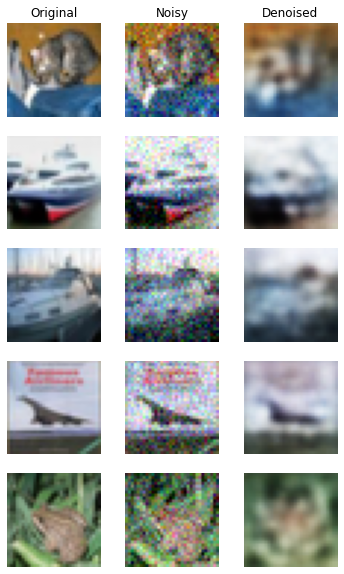

In [7]:
import matplotlib.pyplot as plt
import numpy as np

n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 32, 32, 3) * 0.1
new_images_denoised = denoising_autoencoder.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()

In [ ]:
denoising_encoder.trainable = False
denoising_encoder.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
denoising_encoder.trainable = True

In [28]:
denoising_encoder.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
denoising_encoder.fit(X_train[:2000], y_train[:2000], epochs=25, validation_data=(X_test[:2000], y_test[:2000]))

Epoch 1/25
63/63 [==============================] - 1s 9ms/step - loss: 1.7561 - accuracy: 0.5230 - val_loss: 1.8066 - val_accuracy: 0.3780
Epoch 2/25
63/63 [==============================] - 0s 7ms/step - loss: 1.2054 - accuracy: 0.6060 - val_loss: 1.7102 - val_accuracy: 0.4105
Epoch 3/25
63/63 [==============================] - 0s 7ms/step - loss: 1.0292 - accuracy: 0.6590 - val_loss: 1.6711 - val_accuracy: 0.4280
Epoch 4/25
63/63 [==============================] - 0s 7ms/step - loss: 0.8760 - accuracy: 0.7015 - val_loss: 1.7594 - val_accuracy: 0.4150
Epoch 5/25
63/63 [==============================] - 0s 8ms/step - loss: 0.7208 - accuracy: 0.7685 - val_loss: 1.6510 - val_accuracy: 0.4505
Epoch 6/25
63/63 [==============================] - 0s 7ms/step - loss: 0.6115 - accuracy: 0.8055 - val_loss: 1.7172 - val_accuracy: 0.4395
Epoch 7/25
63/63 [==============================] - 0s 7ms/step - loss: 0.5169 - accuracy: 0.8405 - val_loss: 1.7168 - val_accuracy: 0.4505
Epoch 8/25
63/63 [==